In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# GPU 사용 초기화 및 할당.
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#### CNN(Convolutional Neural Networks)
- 합성곱 계층(Convolutional layer)과 풀링 계층 (Pooling layer)이라고 하는 새로운 층을 fully-connected 계층 이전에 추가함으로써 원본 이미지에 필터링 기법을 적용한 뒤에 필터링된 이미에 대해 분류 연산이 수행되도록 구성.


In [2]:
# 시드값 설정.
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 읽기.
(x_train , y_train), (x_test, y_test) = mnist.load_data()

# 2차원으로 되어 있는 이미지 한장의 데이터를 CNN에 적합한 행렬 형태로 변환.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1 )
x_test  = x_test.reshape(x_test.shape[0],  28, 28, 1 )

# 0 ~ 1 사이의 값으로 조정.
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = x_train / 255
x_test  = x_test / 255
 
# 결과 데이터 핫-윈 인코딩.
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

In [3]:
# < CNN 설정 >
# Conv2D : Keras에서 컨볼루션 레이어를 추가하는 함수.
# Maxplooling20 : 데이터 축소.
# Dropout : 은닉층의 노드를 임의로 꺼주는 것.(과적합 방지.)
# Flatten : 2차원 배열을 1차원로 변환.
model = Sequential()

# 입력층 + 은닉층 : Conv2D
model.add( Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu') )

# 은닉층 : Conv2D
model.add( Conv2D(64, kernel_size=(3,3), activation='relu') )

# 은닉층 : Maxpooling2D
model.add( MaxPooling2D(pool_size=2) )

# 은닉층 : Dropout
model.add(Dropout(0.25) )
          
# 은닉층 : Flatten
model.add( Flatten() )

# 은닉층 : Dense
model.add( Dense(128, activation='relu') )
model.add( Dropout(0.5) )  
      
# 출력층.
model.add( Dense(10, activation='softmax'))

In [4]:
# 컴파일.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 저장 콜백.
model_path = 'models/{epoch}-{val_loss}.hdf5'

# 저장 조건 콜백.
callback1 = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

# 조기중단 콜백.
callback2 = EarlyStopping(monitor='val_loss', patience=10)

# 학습.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=40, batch_size=20, verbose=0, callbacks=[callback1, callback2] )


Epoch 00001: val_loss improved from inf to 0.04286, saving model to models\1-0.04285911098122597.hdf5

Epoch 00002: val_loss did not improve from 0.04286

Epoch 00003: val_loss improved from 0.04286 to 0.03280, saving model to models\3-0.03279644995927811.hdf5

Epoch 00004: val_loss improved from 0.03280 to 0.03125, saving model to models\4-0.03124648705124855.hdf5

Epoch 00005: val_loss did not improve from 0.03125

Epoch 00006: val_loss did not improve from 0.03125

Epoch 00007: val_loss improved from 0.03125 to 0.02996, saving model to models\7-0.029957473278045654.hdf5

Epoch 00008: val_loss improved from 0.02996 to 0.02661, saving model to models\8-0.02661106549203396.hdf5

Epoch 00009: val_loss did not improve from 0.02661

Epoch 00010: val_loss did not improve from 0.02661

Epoch 00011: val_loss did not improve from 0.02661

Epoch 00012: val_loss did not improve from 0.02661

Epoch 00013: val_loss did not improve from 0.02661

Epoch 00014: val_loss did not improve from 0.02661


In [5]:
# 정확도 확인. => 기본 딥러닝에 비해 정확도가 올라가는 것을 알 수 있음.
best_model = load_model('models/8-0.02661106549203396.hdf5')
best_model.evaluate(x_test, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9922


0.9922000169754028

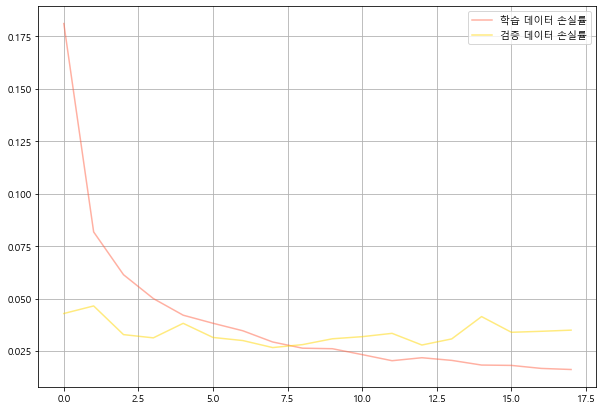

In [7]:
# 학습용 데이터 오차.
y_loss = history.history['loss']

# 검증용 데이터 오차.
y_vloss = history.history['val_loss']

# 그래프.
x_len = np.arange(len(y_vloss))
plt.figure(figsize=(10, 7))
plt.plot(x_len, y_loss, marker='', label='학습 데이터 손실률', c='tomato', alpha=.5 )
plt.plot(x_len, y_vloss, marker='', label='검증 데이터 손실률', c='gold', alpha=.5 )
plt.legend()
plt.grid()
plt.show()